# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Resources/DATA/hearing_test.csv')

In [3]:
df.head(2)

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df.test_result.value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

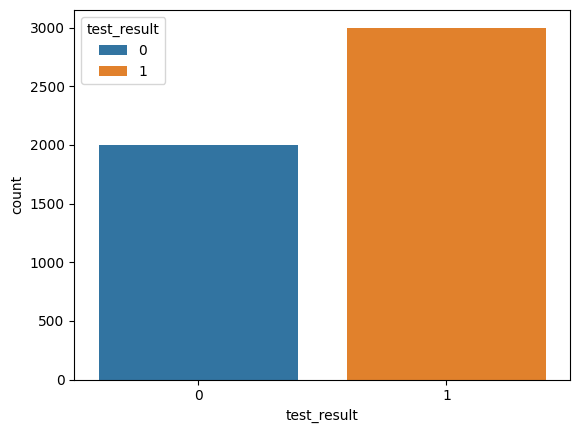

In [7]:
sns.countplot(x=df.test_result, hue=df.test_result)

<Axes: xlabel='test_result', ylabel='age'>

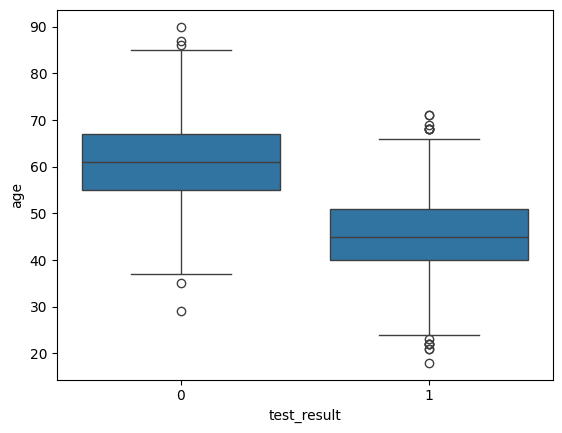

In [8]:
sns.boxplot(x=df.test_result, y=df.age)

<Axes: xlabel='test_result', ylabel='physical_score'>

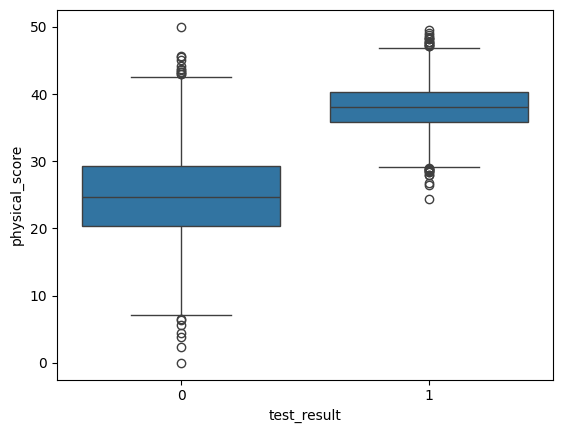

In [9]:
sns.boxplot(x=df.test_result, y=df.physical_score)

<Axes: xlabel='age', ylabel='physical_score'>

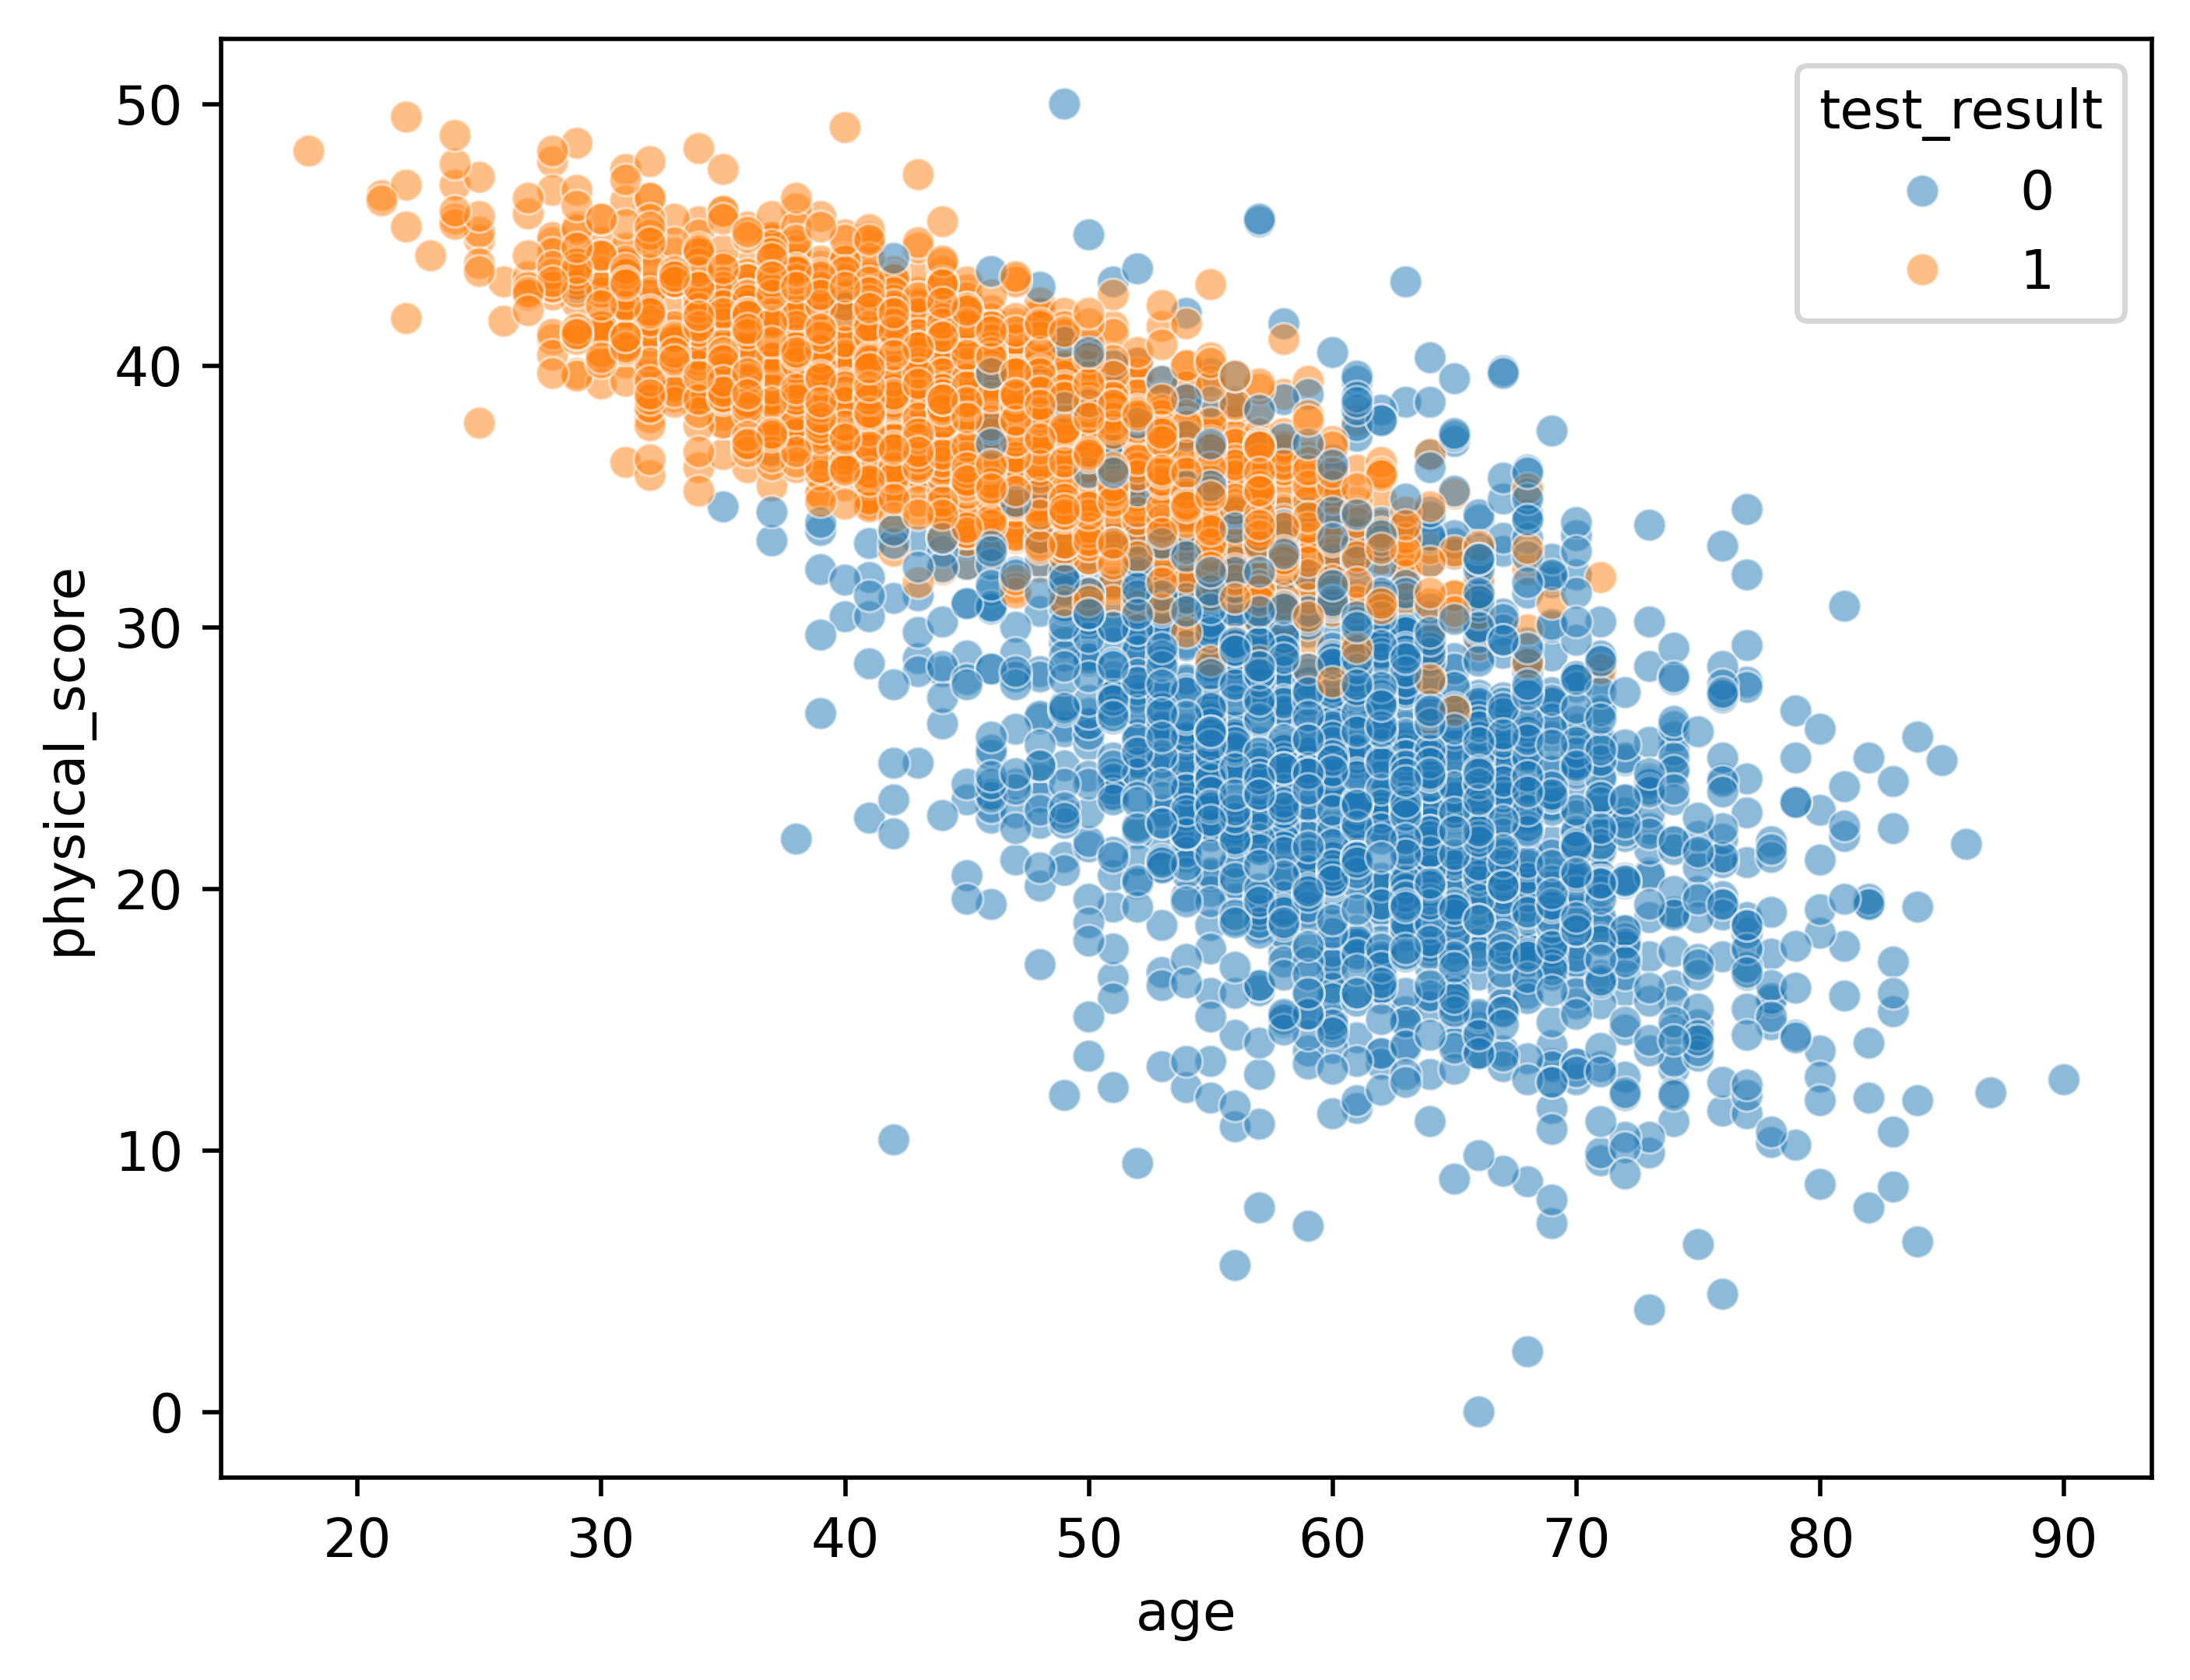

In [14]:
plt.figure(dpi=500)
sns.scatterplot(x=df.age, y=df.physical_score, hue=df.test_result, alpha=0.5)

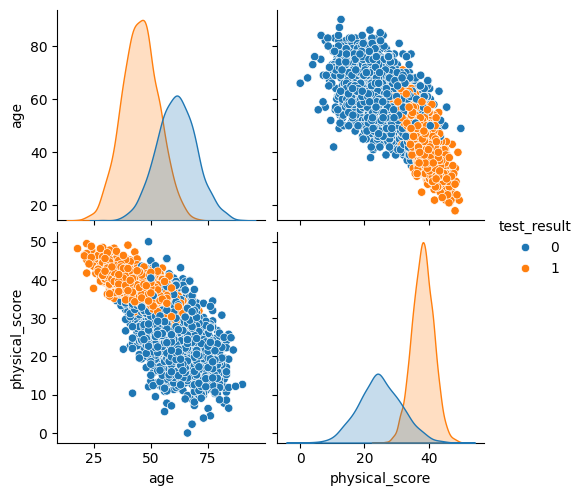

In [18]:
sns.pairplot(df, hue='test_result')

<Axes: >

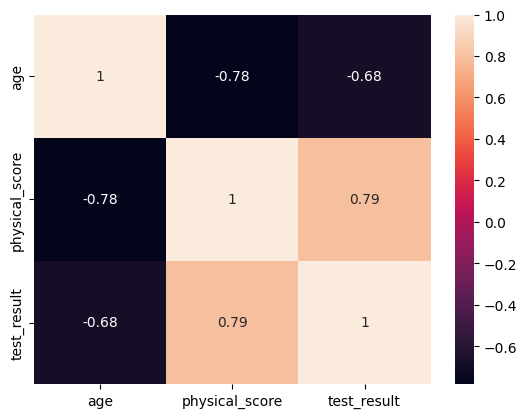

In [19]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='test_result', ylabel='physical_score'>

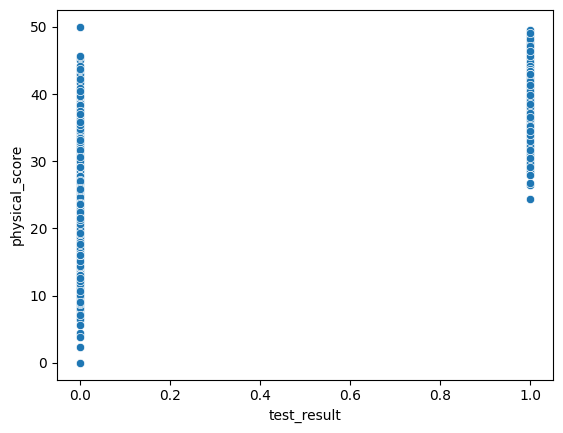

In [21]:
sns.scatterplot(y=df.physical_score, x=df.test_result)

In [22]:
from mpl_toolkits.mplot3d import Axes3D

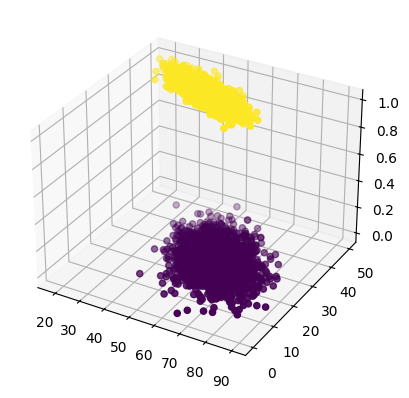

In [26]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'],c=df['test_result'])

In [27]:
X = df.drop('test_result', axis=1)
y = df.test_result

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=101)

In [31]:
scaler = StandardScaler()

In [32]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log = LogisticRegression()

In [35]:
log.fit(scaled_X_train, y_train)

LogisticRegression()

In [36]:
log.coef_

array([[-0.95017725,  3.46148946]])

In [37]:
y_pred=log.predict_proba(scaled_X_test)

In [38]:
y_pred

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
y_pred = log.predict(scaled_X_test)

In [41]:
accuracy_score(y_pred, y_test)

0.93

In [46]:
cm=confusion_matrix(y_pred, y_test)

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

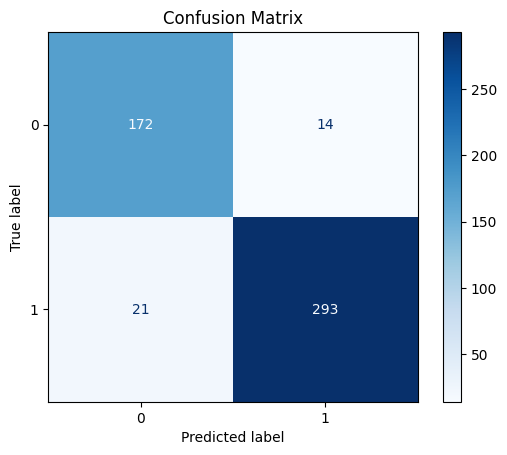

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       186
           1       0.95      0.93      0.94       314

    accuracy                           0.93       500
   macro avg       0.92      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



In [55]:
from sklearn.metrics import precision_score, recall_score

In [71]:
precision_score(y_pred, y_test)

0.9543973941368078

In [72]:
recall_score(y_pred, y_test)

0.9331210191082803

In [70]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, roc_curve, precision_recall_curve

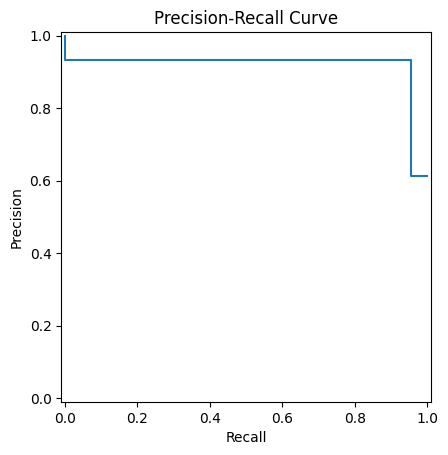

In [73]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision, recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [64]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


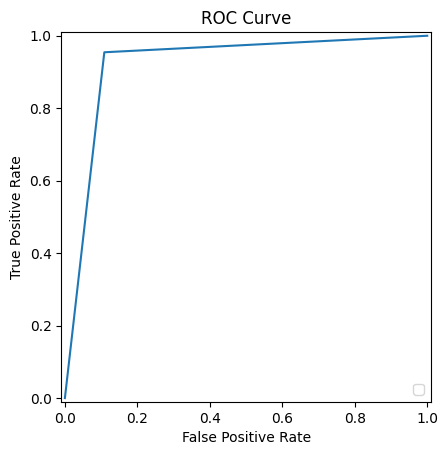

In [65]:
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title('ROC Curve')
plt.show()

In [76]:
log.predict_proba(scaled_X_test)[0]

array([0.02380517, 0.97619483])

In [77]:
y_test[0]

1